In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [10]:
output_data = "Resources/Project1Data.csv"
output_data2 = "Resources/2018SASB.csv"
data_df = pd.read_csv(output_data)
data2_df = pd.read_csv(output_data2)
data_df

,SCL_UNITID,SCL_NAME,SPORT_CODE,SPORT_NAME,SCL_HBCU,SCL_PRIVATE,APR_RATE_2019_1000,ELIG_RATE_2019,RET_RATE_2019,NUM_OF_ATHLETES_2019,...,RET_RATE_2006,NUM_OF_ATHLETES_2006,APR_RATE_2005_1000,ELIG_RATE_2005,RET_RATE_2005,NUM_OF_ATHLETES_2005,APR_RATE_2004_1000,ELIG_RATE_2004,RET_RATE_2004,NUM_OF_ATHLETES_2004
0,100654,Alabama A&M University,1,Baseball,Y,N,947.0,0.947368,0.945946,19.0,...,0.948718,21.0,917.0,0.880952,0.952381,21.0,975.0,0.97500,0.975000,20.0
1,100654,Alabama A&M University,2,Men's Basketball,Y,N,867.0,0.875000,0.857143,13.0,...,0.846154,13.0,909.0,0.909091,0.909091,11.0,950.0,0.95000,0.950000,10.0
2,100654,Alabama A&M University,4,Football,Y,N,900.0,0.889655,0.909722,78.0,...,0.962963,70.0,921.0,0.875862,0.965517,74.0,871.0,0.86014,0.881119,74.0
3,100654,Alabama A&M University,6,Men's Golf,Y,N,962.0,1.000000,0.923077,7.0,...,0.888889,5.0,929.0,0.857143,1.000000,7.0,NaN,NaN,NaN,NaN
4,100654,Alabama A&M University,13,Men's Tennis,Y,N,1000.0,1.000000,1.000000,7.0,...,0.888889,5.0,1000.0,1.000000,1.000000,4.0,958.0,1.00000,0.916667,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,486840,Kennesaw State University,28,Women's Softball,N,N,1000.0,1.000000,1.000000,24.0,...,0.916667,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6013,486840,Kennesaw State University,30,Women's Soccer,N,N,1000.0,1.000000,1.000000,29.0,...,0.973684,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6014,486840,Kennesaw State University,33,Women's Tennis,N,N,1000.0,1.000000,1.000000,9.0,...,0.933333,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6015,486840,Kennesaw State University,34,"Women's Track, Cross Country",N,N,1000.0,1.000000,1.000000,32.0,...,0.941176,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_df["SCL_NAME"].nunique()

385

In [12]:
# APR scores over time
combined_years_df = data_df[["SPORT_NAME", "APR_RATE_2019_1000", "APR_RATE_2018_1000", "APR_RATE_2017_1000"]]
combined_years_df

combined_years_df["SPORT_NAME"].nunique()



37

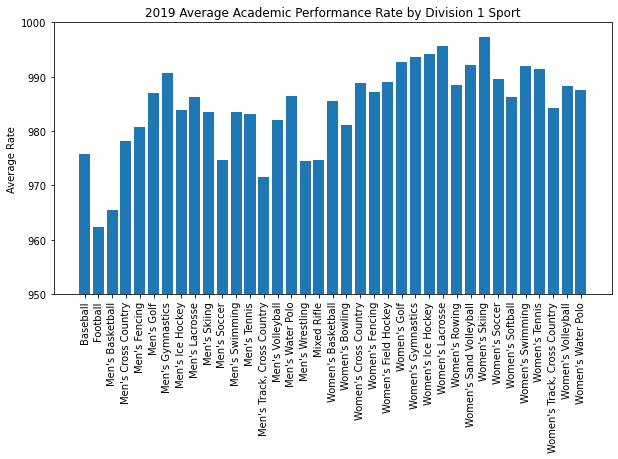

In [13]:
# Create grouped dataframe by sport 
mean = combined_years_df['APR_RATE_2019_1000'].groupby(combined_years_df['SPORT_NAME']).mean()
mean_df = mean_df.reset_index()
mean_df = pd.DataFrame({"APR_RATE_2019_1000": mean})
mean_df

# Graph sport vs average APR score
sport_names = mean_df.index.tolist()
x_axis = sport_names
y_axis = mean_df["APR_RATE_2019_1000"]

plt.figure(figsize = (10,5))
plt.bar(x_axis,y_axis)
plt.xticks(x_axis,rotation="vertical")

# Labels
plt.ylabel("Average Rate")
plt.title("2019 Average Academic Performance Rate by Division 1 Sport")
plt.ylim(950,1000)

plt.savefig("Images/SportComparisonAPR_bar_2019.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [14]:
mean_df = mean_df.reset_index()
mean_df["SPORT_NAME"]

0                         Baseball
1                         Football
2                 Men's Basketball
3              Men's Cross Country
4                    Men's Fencing
5                       Men's Golf
6                 Men's Gymnastics
7                 Men's Ice Hockey
8                   Men's Lacrosse
9                     Men's Skiing
10                    Men's Soccer
11                  Men's Swimming
12                    Men's Tennis
13      Men's Track, Cross Country
14                Men's Volleyball
15                Men's Water Polo
16                 Men's Wrestling
17                     Mixed Rifle
18              Women's Basketball
19                 Women's Bowling
20           Women's Cross Country
21                 Women's Fencing
22            Women's Field Hockey
23                    Women's Golf
24              Women's Gymnastics
25              Women's Ice Hockey
26                Women's Lacrosse
27                  Women's Rowing
28         Women's S

In [16]:
# Gender comparison of APR scores

# Separate Mens and Womens sports into lists
Mens_sports = []
Womens_sports = []

for sport_name in sport_names:

    if "Women's" in sport_name:
    
        Womens_sports.append(sport_name)
       
        
    else:
        Mens_sports.append(sport_name)
    
        
print(Womens_sports)
print(Mens_sports)


["Women's Basketball", "Women's Bowling", "Women's Cross Country", "Women's Fencing", "Women's Field Hockey", "Women's Golf", "Women's Gymnastics", "Women's Ice Hockey", "Women's Lacrosse", "Women's Rowing", "Women's Sand Volleyball", "Women's Skiing", "Women's Soccer", "Women's Softball", "Women's Swimming", "Women's Tennis", "Women's Track, Cross Country", "Women's Volleyball", "Women's Water Polo"]
['Baseball', 'Football', "Men's Basketball", "Men's Cross Country", "Men's Fencing", "Men's Golf", "Men's Gymnastics", "Men's Ice Hockey", "Men's Lacrosse", "Men's Skiing", "Men's Soccer", "Men's Swimming", "Men's Tennis", "Men's Track, Cross Country", "Men's Volleyball", "Men's Water Polo", "Men's Wrestling", 'Mixed Rifle']


In [17]:
# Dataframe for womens sports and avg APR score

Womens_APR = mean_df[mean_df["SPORT_NAME"].isin(Womens_sports)]
Womens_APR

,SPORT_NAME,APR_RATE_2019_1000
18,Women's Basketball,985.425714
19,Women's Bowling,981.029412
20,Women's Cross Country,988.873156
21,Women's Fencing,987.125000
22,Women's Field Hockey,988.934211
23,Women's Golf,992.638462
24,Women's Gymnastics,993.516667
25,Women's Ice Hockey,994.171429
26,Women's Lacrosse,995.543103
27,Women's Rowing,988.542169


In [18]:
# Dataframe for mens sports and avg APR score

Mens_APR = mean_df[mean_df["SPORT_NAME"].isin(Mens_sports)]
Mens_APR

,SPORT_NAME,APR_RATE_2019_1000
0,Baseball,975.842282
1,Football,962.350394
2,Men's Basketball,965.548295
3,Men's Cross Country,978.153846
4,Men's Fencing,980.812500
5,Men's Golf,987.034130
6,Men's Gymnastics,990.615385
7,Men's Ice Hockey,983.883333
8,Men's Lacrosse,986.178082
9,Men's Skiing,983.555556


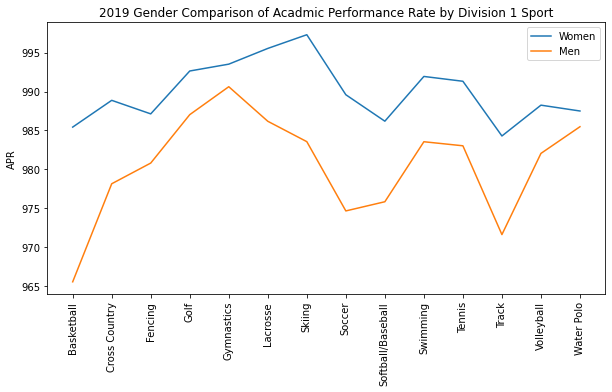

In [19]:
# Mens vs Womens 2019 average

sport_list = ["Basketball", "Cross Country", "Fencing", "Golf", "Gymnastics","Lacrosse","Skiing","Soccer","Softball/Baseball"
              ,"Swimming","Tennis","Track","Volleyball","Water Polo"]
Mens = [965.55, 978.15,980.81,987.03, 990.62, 986.18, 983.56, 974.66, 975.84, 983.55, 983.03, 971.62, 982.05, 985.48 ]

Womens = [985.43, 988.87, 987.13, 992.64, 993.52, 995.54, 997.30, 989.59, 986.19, 991.94, 991.32, 984.29, 988.25, 987.50]
    
plt.figure(figsize = (10,5))
plt.plot(sport_list, Womens, label = "Women")
plt.plot(sport_list, Mens, label = "Men")
plt.xticks(sport_list,rotation="vertical")
plt.legend()
plt.title("2019 Gender Comparison of Acadmic Performance Rate by Division 1 Sport")
plt.ylabel("APR")

plt.savefig("Images/GenderComparisonAPR_line_2019.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [20]:
data2_df




,SCL_NAME,SCL_DIVISION,SCL_CONFERENCE,FED_N_SA,FED_RATE_SA,GSR_N_SA,GSR_SA,FED_N_MALE_SA,FED_RATE_MALE_SA,FED_N_FEMALE_SA,...,GSR_N_MALE_SA,GSR_MALE_SA,GSR_N_FEMALE_SA,GSR_FEMALE_SA,FED_N_SB,FED_RATE_SB,FED_N_MALE_SB,FED_RATE_MALE_SB,FED_N_FEMALE_SB,FED_RATE_FEMALE_SB
0,Alabama A&M University,1,Southwestern Athletic Conf.,211.0,46.0,241,60,135.0,37.0,76.0,...,146,53,95,71,3998,30,1919,23,2079,36
1,University of Alabama at Birmingham,1,Conference USA,227.0,67.0,261,84,115.0,58.0,112.0,...,146,77,115,93,5850,54,2583,48,3267,59
2,Alabama State University,1,Southwestern Athletic Conf.,233.0,52.0,242,72,131.0,44.0,102.0,...,133,63,109,83,4727,26,2107,20,2620,31
3,University of Alabama,1,Southeastern Conference,322.0,70.0,331,89,151.0,64.0,171.0,...,160,87,171,92,21179,67,9512,63,11667,71
4,Auburn University,1,Southeastern Conference,378.0,66.0,365,84,196.0,60.0,182.0,...,199,77,166,92,16260,74,7835,69,8425,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,University of Wyoming,1,Mountain West Conference,294.0,62.0,297,82,159.0,55.0,135.0,...,165,78,132,89,6212,56,3075,50,3137,61
347,Stanford University,1,Pac-12 Conference,468.0,94.0,456,97,236.0,92.0,232.0,...,227,96,229,98,6747,94,3491,93,3256,96
348,Purdue University,1,Big Ten Conference,312.0,73.0,319,85,186.0,66.0,126.0,...,195,79,124,95,25688,76,14441,74,11247,79
349,Florida Gulf Coast University,1,ASUN Conference,175.0,53.0,167,83,76.0,38.0,99.0,...,70,70,97,92,8420,46,3778,42,4642,50


In [21]:
# Comparing federal student athelete rate with federal student body rate

fed_rate_df = data2_df[["SCL_NAME", "FED_N_SA", "FED_RATE_SA", "FED_N_SB", "FED_RATE_SB"]].dropna()
fed_rate_df

,SCL_NAME,FED_N_SA,FED_RATE_SA,FED_N_SB,FED_RATE_SB
0,Alabama A&M University,211.0,46.0,3998,30
1,University of Alabama at Birmingham,227.0,67.0,5850,54
2,Alabama State University,233.0,52.0,4727,26
3,University of Alabama,322.0,70.0,21179,67
4,Auburn University,378.0,66.0,16260,74
...,...,...,...,...,...
346,University of Wyoming,294.0,62.0,6212,56
347,Stanford University,468.0,94.0,6747,94
348,Purdue University,312.0,73.0,25688,76
349,Florida Gulf Coast University,175.0,53.0,8420,46


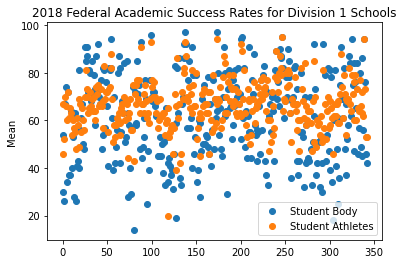

In [22]:
# Scatter Plot of Data
sample = fed_rate_df["FED_RATE_SA"]
population = fed_rate_df["FED_RATE_SB"]

plt.subplot(1, 1, 1)
plt.scatter(range(len(population)), population, label="Student Body")
plt.scatter(range(len(sample)), sample, label="Student Athletes")
plt.legend()
plt.ylabel("Mean")
plt.title("2018 Federal Academic Success Rates for Division 1 Schools")

plt.savefig("Images/ttest_scatter_2018.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

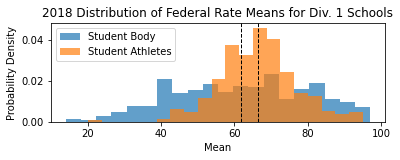

In [25]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="Student Body")
plt.hist(sample, 20, density=True, alpha=0.7, label="Student Athletes")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()
plt.title("2018 Distribution of Federal Rate Means for Div. 1 Schools")
plt.ylabel("Probability Density")
plt.xlabel("Mean")

plt.savefig("Images/ttest_dist_2018.png", dpi=None, facecolor='w', edgecolor='w',orientation='portrait', 
            format=None, transparent=False, bbox_inches="tight", pad_inches=0.5, metadata=None)

In [26]:
st.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=8.107709909389616, pvalue=9.29815490794947e-15)

Since our p-value is less than 0.05, we can reject our null hypothesis and conclude that, 
in terms of federal academic success rate, there is generally more academic success amongst student athletes 
compared to the general student body.

In [ ]:
# Geographical representation of schools by APR score